## Guiding Questions

In [343]:
from collections import defaultdict
import pandas as pd
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv(
    '../data/income-brackets.csv', 
    thousands=',',
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    names = ['Year', 'Household Income Bracket', 'Total']
)
df

,Year,Household Income Bracket,Total
0,Year,None,NaN
1,1998,"<$5,000/LOSS/NO INCOME",175342.0
2,1998,"$5,000 TO $9,999",257951.0
3,1998,"$10,000 TO $14,999",194076.0
4,1998,"$15,000 TO $19,999",151295.0
5,1998,"$20,000 TO $24,999",149033.0
6,1998,"$25,000 TO $29,999",132168.0
7,1998,"$30,000 TO $34,999",119129.0
8,1998,"$35,000 TO $39,999",109704.0
9,1998,"$40,000 TO $49,999",171950.0


In [345]:
# eliminate repetition and categorize main fields and sexes
year = list(df['Year'].unique()) 
year

['Year', '1998', '2001', '2004', '2007', '2010', '2013']

In [346]:
# Format: { income: { year: count } } }
counts = defaultdict(dict)

# loop through all rows in dataframe
for _, row in df.iterrows():
    year = row['Year']
    income = row['Household Income Bracket']
    count = row['Total']
    counts[income][year] = count
    
counts


defaultdict(dict,
            {None: {'Year': nan},
             '<$5,000/LOSS/NO INCOME': {'1998': 175342.0,
              '2001': 140230.0,
              '2004': 134222.0,
              '2007': 172254.0,
              '2010': 112611.0,
              '2013': 107096.0},
             '$5,000 TO $9,999': {'1998': 257951.0,
              '2001': 234954.0,
              '2004': 213920.0,
              '2007': 183710.0,
              '2010': 178945.0,
              '2013': 150365.0},
             '$10,000 TO $14,999': {'1998': 194076.0,
              '2001': 170855.0,
              '2004': 170744.0,
              '2007': 146077.0,
              '2010': 168006.0,
              '2013': 144682.0},
             '$15,000 TO $19,999': {'1998': 151295.0,
              '2001': 150832.0,
              '2004': 156308.0,
              '2007': 129478.0,
              '2010': 145942.0,
              '2013': 137208.0},
             '$20,000 TO $24,999 ': {'1998': 149033.0,
              '2001': 136954.0,

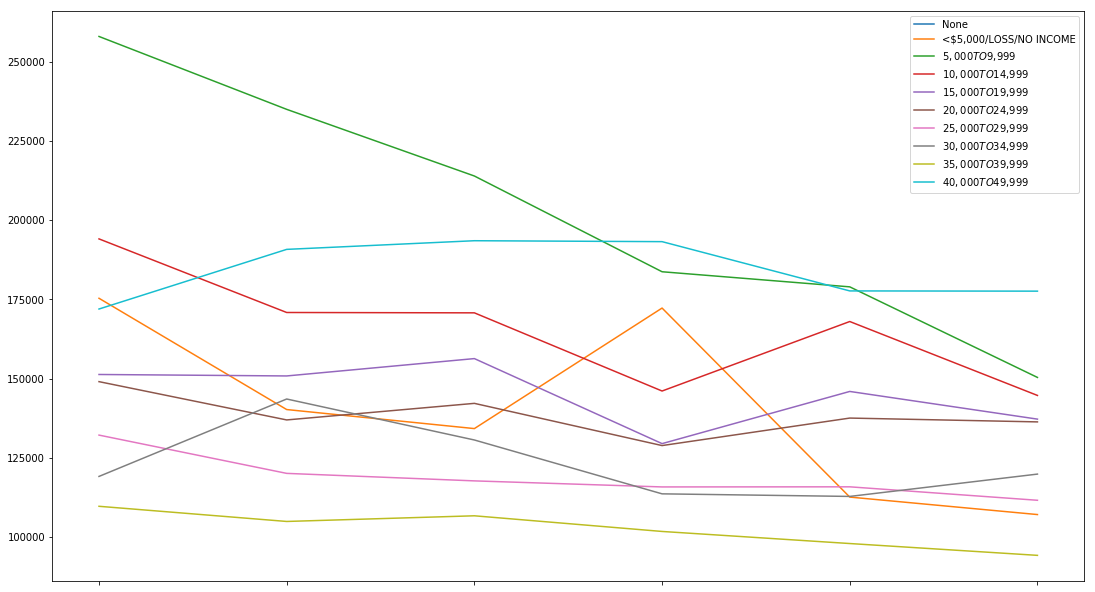

In [347]:
income = list(counts.keys())
years = list(counts.values())

df = pd.DataFrame(counts)
df


df.plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.savefig("housing-incomes.pdf", transparent = True)




In [348]:
raw_data = {'Year': ['1998', '2001', '2004', '2007', '2010', '2013'],
        'Total Renter Occupied': [175342, 140230, 134222, 172254, 112611, 107096],
        'Public Housing': [28897, 22322, 19438, 31719, 13276, 15531],
        #'All Other Housing (Government Assisted/Regulated)': [47763, 39508, 42628, 50152, 4713, 3948]
            }
df = pd.DataFrame(raw_data, columns = ['Year', 'Total Renter Occupied', 'Public Housing'])
df

,Year,Total Renter Occupied,Public Housing
0,1998,175342,28897
1,2001,140230,22322
2,2004,134222,19438
3,2007,172254,31719
4,2010,112611,13276
5,2013,107096,15531


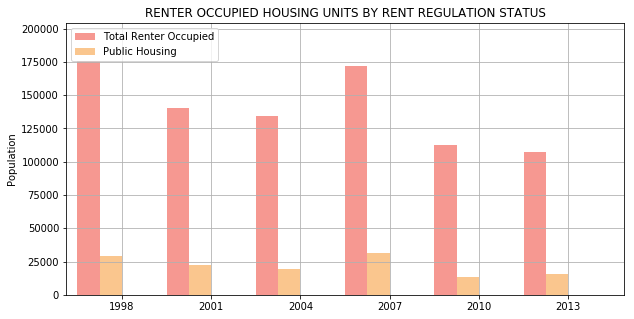

In [349]:
# Setting the positions and width for the bars
pos = list(range(len(df['Total Renter Occupied']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['Total Renter Occupied'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['Year'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['Public Housing'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['Year'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
#plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
#        df['All Other Housing (Government Assisted/Regulated)'], 
        # of width
#        width, 
        # with alpha 0.5
#        alpha=0.5, 
        # with color
#        color='#FFC222', 
        # with label the third value in first_name
#        label=df['Year'][2]) 


# Set the y axis label
ax.set_ylabel('Population')

# Set the chart's title
ax.set_title('RENTER OCCUPIED HOUSING UNITS BY RENT REGULATION STATUS')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Total Renter Occupied'] + df['Public Housing'])])

# Adding the legend and showing the plot
plt.legend(['Total Renter Occupied', 'Public Housing'], loc='upper left')
plt.grid()
plt.show()

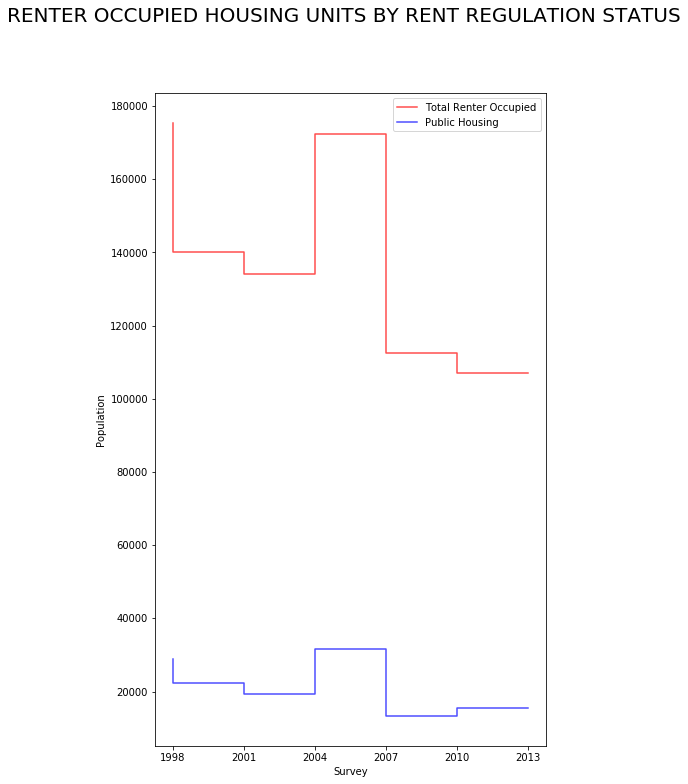

In [350]:
#step plot
fig, ax = plt.subplots(figsize=(7,12))
fig.suptitle('RENTER OCCUPIED HOUSING UNITS BY RENT REGULATION STATUS', 
            fontsize = 20)
# multiple line plot
    
plt.step(df['Year'], df['Total Renter Occupied'], marker='', color='red', alpha=0.7)
plt.step(df['Year'], df['Public Housing'], marker='', color='blue', alpha=0.7)

plt.legend()
    
# need to fix repeat in legend

plt.xlabel("Survey")
plt.ylabel("Population")

#plt.savefig("housing.pdf", transparent = True)

plt.show()


In [351]:
#scrapped data

df1 = pd.read_csv('../data/1998-housing-affordability.csv', 
    delimiter = ',',
    header=4, 
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    )
df1 = df1.iloc[[1], [0,1,7,8]]
df1 = df1.replace({'. LESS THAN $5,000/LOSS/NO INCOME': '1998', True: False})

df2 = pd.read_csv('../data/2001-housing-affordability.csv', 
    delimiter = ',',
    header=4, 
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    )
df2 = df2.iloc[[1], [0,1,7,8]]
df2 = df2.replace({'LESS THAN $5,000/LOSS/NO INCOME': '2001', True: False})


df3 = pd.read_csv('../data/2004-housing-affordability.csv', 
    delimiter = ',',
    header=5, 
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    )
df3 = df3.iloc[[1], [0,1,7,8]]
df3 = df3.replace({'LESS THAN $5,000/LOSS/NO INCOME': '2004', True: False})


df = pd.concat([df1, df2, df3], ignore_index=True)
df = df.rename(columns={'Unnamed: 0': 'YEAR'})
df

,YEAR,TOTAL RENTER OCCUPIED,PUBLIC HOUSING,ALL OTHER RENTER HOUSING
0,1998,175342,28897,47763
1,2001,140230,22322,39508
2,2004,134222,19438,42628
